# Regresión Lineal

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression  # Corrección aquí
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score  # COEFICIENTE DE DETERMINACIÓN
import numpy as np

In [2]:
# DF
datos = pd.DataFrame({
    'Horas de Estudio': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11], #Variable Independiente 
    'Calificación Final': [50, 55, 60, 65, 70, 75, 80, 85, 90, 95] #Variable Dependiente 
})
datos.head()

,Horas de Estudio,Calificación Final
0,2,50
1,3,55
2,4,60
3,5,65
4,6,70


In [3]:
#Separar las variables
vInd = datos[['Horas de Estudio']].values.reshape(-1,1)  # Variable independiente (debe ser 2D) #Hacer bidimensional
vDep = datos['Calificación Final'].values    # Variable dependiente

In [4]:
# Dividir datos en entrenamiento y pruebas
# Fase de entrenamiento = 80%
# Fase de prubas = 20%
vInd_entrenamiento, vInd_pruebas, vDep_entrenamiento, vDep_pruebas = train_test_split(vInd, vDep, test_size=0.2, random_state=42)


In [5]:
# Crear y ajustar el modelo. Aplicar el modelo de regresion lineal simple
modelo = LinearRegression()
modelo.fit(vInd_entrenamiento, vDep_entrenamiento)

LinearRegression()

In [6]:
# Pendiente e Intersección
pendiente = modelo.coef_[0]
interseccion = modelo.intercept_

print(f'Pendiente (m): {pendiente}')
print(f'Interseccion (b): {interseccion}')

Pendiente (m): 5.000000000000001
Interseccion (b): 39.99999999999999


In [7]:
# Calcular las predicciones
pediccion_entrenamiento = modelo.predict(vInd_entrenamiento)
# Calcular las predicciones
pediccion_pruebas = modelo.predict(vInd_pruebas)

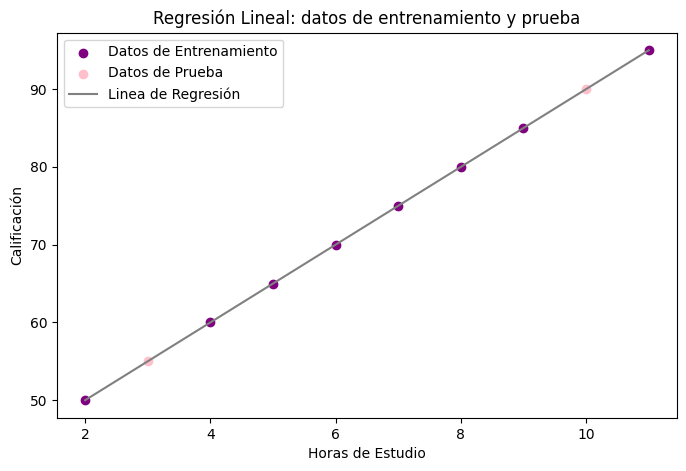

R2 en datos de prueba: 1.0


In [8]:
#CREAR LA FIGURA DEL GRAFICO
plt.figure(figsize=(8,5))

#VALORES DE ENTRENAMIENTO
plt.scatter(vInd_entrenamiento, vDep_entrenamiento, label='Datos de Entrenamiento', color='purple')

#VALORES DE PRUEBA
plt.scatter(vInd_pruebas, vDep_pruebas, label='Datos de Prueba', color='pink')

#GRAFICAR LINEA DE REGRESION LINEAL SIMPLE
Linea = np.linspace(min(vInd), max(vInd)).reshape(-1, 1)
LineaPrediccion = modelo.predict(Linea)
plt.plot(Linea, LineaPrediccion, label='Linea de Regresión', color='grey')

#ETIQUETAS EJE X EJE Y Y TITULOS
plt.xlabel('Horas de Estudio')
plt.ylabel('Calificación')
plt.title('Regresión Lineal: datos de entrenamiento y prueba')
plt.legend()
plt.show()



# Calcular las predicciones para los datos de prueba
prediccion_pruebas = modelo.predict(vInd_pruebas)

# R2 - Coeficiente de determinación para los datos de prueba
r2_pruebas = r2_score(vDep_pruebas, prediccion_pruebas)
print(f"R2 en datos de prueba: {r2_pruebas}")

